In [1]:
import json
import torch
import numpy as np
from transformers import AdamW
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from torch.utils.data import Subset

c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = 'qa_dataset.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
# Original 
# Prepare data 

# Tokenizing the data
# inputs = tokenizer([x['question'] + " [SEP] " + x['answer'] for x in data], padding=True, truncation=True, return_tensors="pt")

# Assuming binary classification (change as needed)
# labels = torch.tensor([1 if x['answer_length'] > 100 else 0 for x in data])

# Create a dataset
# dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

In [5]:
# Prepare data

# Tokenizing the data
max_length = max(len(tokenizer.encode(x['question'] + " [SEP] " + x['answer'])) for x in data)
tokenized_data = [tokenizer(x['question'] + " [SEP] " + x['answer'], 
                            padding='max_length',  
                            max_length=max_length,  
                            truncation=True, 
                            return_tensors="pt") for x in data]

# input
input_ids = torch.cat([item['input_ids'] for item in tokenized_data], dim=0)
attention_masks = torch.cat([item['attention_mask'] for item in tokenized_data], dim=0)
labels = torch.tensor([1 if x['answer_length'] > 100 else 0 for x in data])

# dataset seprate
input_ids_train, input_ids_test, attention_masks_train, attention_masks_test, labels_train, labels_test = train_test_split(
    input_ids, attention_masks, labels, train_size=0.7, random_state=42)

# create dataset
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataset = TensorDataset(input_ids, attention_masks, labels)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# check GPU is work
# Train the model using a suitable optimizer and loss function.
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

CUDA is available. Using GPU.


In [8]:
print(len(dataset))
dataset[:10]

1628


(tensor([[ 101, 2515, 2023,  ...,    0,    0,    0],
         [ 101, 2064, 2017,  ...,    0,    0,    0],
         [ 101, 2054, 2003,  ...,    0,    0,    0],
         ...,
         [ 101, 2064, 2009,  ...,    0,    0,    0],
         [ 101, 7632, 2515,  ...,    0,    0,    0],
         [ 101, 2003, 1996,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 0]))

## Config 1-8

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Parameters: 
    Batch size: 4
    Epochs: 25
    Learning rate:1e-05



c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 25: 100%|██████████| 285/285 [00:44<00:00,  6.45it/s, loss=0.000137]


Loss on training: [0.3728603225397436, 0.1595429493424793, 0.061851121319392535, 0.03263494303539853, 0.019264916288911513, 0.0012607566093241697, 0.0007756983959361127, 0.0005494942424998602, 0.0004166449720893676, 0.0003377624296199269, 0.0002534672869124303, 0.00020883632200900792, 0.00016970583842760932, 0.00013902669414069113, 0.0001151190109994148, 9.90145510928542e-05, 8.343303620278133e-05, 0.07604774169001183, 0.06365864756414993, 0.01173559029034151, 0.016309166439092034, 0.0010589074847909311, 0.00025663965168764424, 0.000176008670946191, 0.0001365924863197857]


Evaluating: 100%|██████████| 123/123 [00:05<00:00, 22.60it/s]


Accuracy on test set: 0.9570552147239264


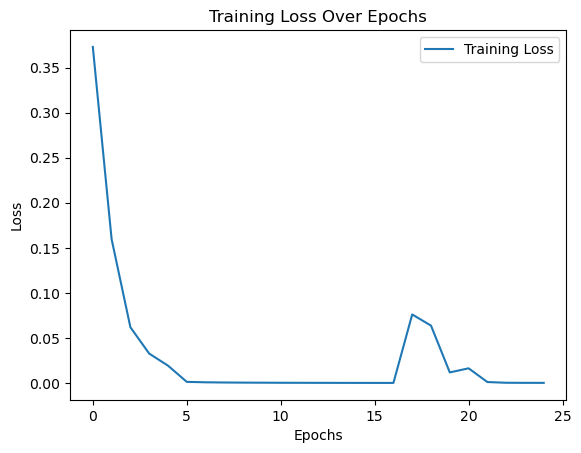

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 4
    Epochs: 25
    Learning rate:0.0001



Epoch 25: 100%|██████████| 285/285 [00:44<00:00,  6.43it/s, loss=2.11e-5]


Loss on training: [0.35690931618997923, 0.1381112632619446, 0.05376501740364913, 0.036748769423483235, 0.027103278931361018, 0.0014534329182648083, 0.0008310504609988512, 0.0004807028880653282, 0.00035338942140234603, 0.00026572233550005447, 0.00021320766488012546, 0.00017075575168220032, 0.00013928059779573233, 0.00011894981315044947, 9.741357050523603e-05, 8.453160225415782e-05, 6.931088001900271e-05, 5.810359342783494e-05, 4.9327605972250335e-05, 4.341388246980945e-05, 3.76944810436965e-05, 3.2086907639607316e-05, 2.767802957111455e-05, 2.452595636944017e-05, 2.1106108001651846e-05]


Evaluating: 100%|██████████| 123/123 [00:05<00:00, 22.80it/s]


Accuracy on test set: 0.9468302658486708


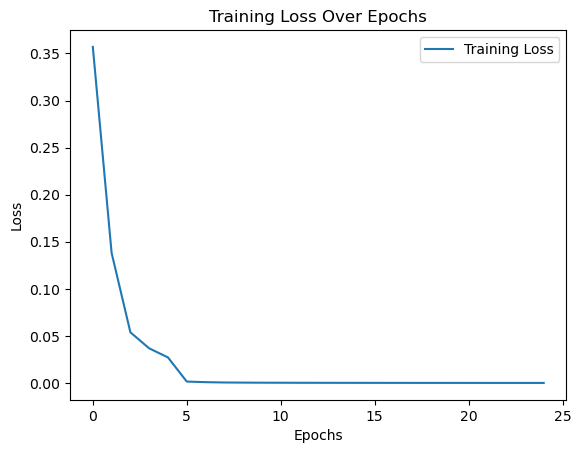

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 4
    Epochs: 30
    Learning rate:1e-05



Epoch 30: 100%|██████████| 285/285 [00:40<00:00,  7.02it/s, loss=2.49e-5]


Loss on training: [0.3983791684372383, 0.23780503551426688, 0.10890476805435723, 0.04841021614132874, 0.028136948333121838, 0.037726678576916785, 0.039828131359944674, 0.004031372161504502, 0.0009477131381189745, 0.0045883520946964585, 0.0005715468706942997, 0.0003637235166439623, 0.07650427024391798, 0.020060825686934486, 0.0014054534455920618, 0.00037801638306853805, 0.00027650305549430316, 0.00020797239144724843, 0.00015463403192769506, 0.0001256919729808272, 0.00010997386094746425, 8.215038113504355e-05, 7.174736017253038e-05, 5.881307952222414e-05, 5.1640447494910885e-05, 4.438343501278085e-05, 3.8598988670089873e-05, 3.473970353202037e-05, 2.843091708455815e-05, 2.4920972955761387e-05]


Evaluating: 100%|██████████| 123/123 [00:05<00:00, 24.59it/s]


Accuracy on test set: 0.9366053169734151


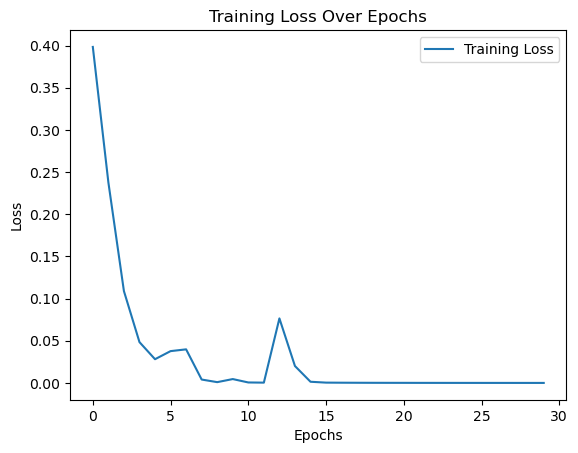

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 4
    Epochs: 30
    Learning rate:0.0001



Epoch 30: 100%|██████████| 285/285 [00:42<00:00,  6.66it/s, loss=1.91e-5]


Loss on training: [0.39589022244735245, 0.16369920243067962, 0.061010796323483975, 0.046036071573759905, 0.0069605248503329786, 0.000589694246075835, 0.00046498795645515714, 0.00026943534081638385, 0.00020308298326358852, 0.00019750182448963945, 0.07176045661885598, 0.08355385805704843, 0.01957161137946522, 0.015824372113045108, 0.0006205886387441863, 0.00024031586893997564, 0.00018602138006826863, 0.00012690427673780441, 0.00010392707009215659, 8.710881946873933e-05, 6.938176828267037e-05, 6.049591609457581e-05, 5.131427484197877e-05, 4.203188605938442e-05, 3.791109270343696e-05, 3.155920615091944e-05, 2.7707141373212562e-05, 2.4764115254296675e-05, 2.115331638043771e-05, 1.9081308681435124e-05]


Evaluating: 100%|██████████| 123/123 [00:05<00:00, 22.92it/s]


Accuracy on test set: 0.9263803680981595


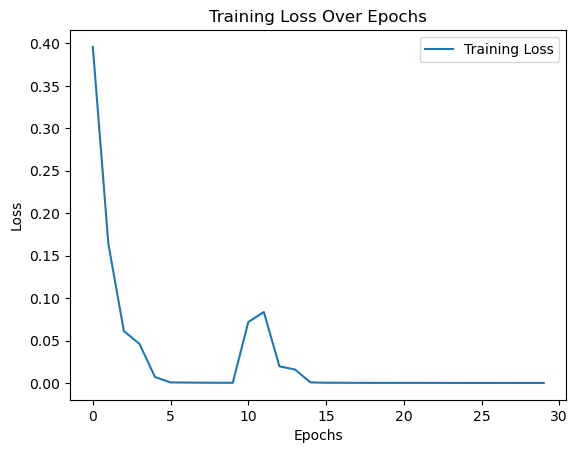

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 8
    Epochs: 25
    Learning rate:1e-05



Epoch 25: 100%|██████████| 143/143 [00:38<00:00,  3.74it/s, loss=0.000118]


Loss on training: [0.46534037121109195, 0.24213772212396134, 0.11558574031699788, 0.04966446809092914, 0.05395330854698078, 0.02573331059901031, 0.014245532511674857, 0.007338785965295209, 0.030871224329543097, 0.0038344307665849897, 0.0031381822993060563, 0.0008514482606124211, 0.0007482013560121658, 0.0005264691318551378, 0.00044097879150934463, 0.00036123192012700795, 0.000306043433293316, 0.00026259801203590147, 0.00023023421237883452, 0.00021366024960949365, 0.0004312299468539903, 0.0002289887735358817, 0.00015404376044008113, 0.0001335609879286087, 0.00011848464502970903]


Evaluating: 100%|██████████| 62/62 [00:05<00:00, 12.00it/s]


Accuracy on test set: 0.9427402862985685


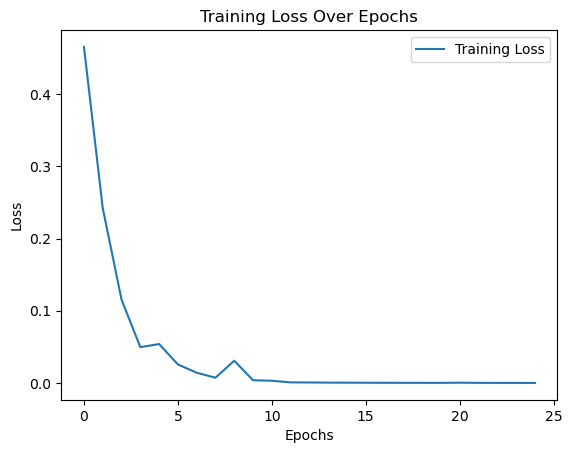

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 8
    Epochs: 25
    Learning rate:0.0001



Epoch 25: 100%|██████████| 143/143 [00:36<00:00,  3.95it/s, loss=7.09e-5]


Loss on training: [0.3718735849732286, 0.12737644555281613, 0.048931865974075416, 0.04066898835288895, 0.016083747399254486, 0.004708329549016939, 0.021387514204415328, 0.02514700272683888, 0.008692253232645391, 0.004481279156276618, 0.0010946087296596252, 0.0004752334403696346, 0.0003283684614311474, 0.0003100050039551957, 0.0002763356813095295, 0.00019125158927432698, 0.0001744343053042348, 0.00016725267844528636, 0.00013894247759371292, 0.0001568201109844299, 0.00011622645587732013, 0.00010331661061471706, 8.630061792710412e-05, 8.049877614358446e-05, 7.091635398337149e-05]


Evaluating: 100%|██████████| 62/62 [00:04<00:00, 12.87it/s]


Accuracy on test set: 0.934560327198364


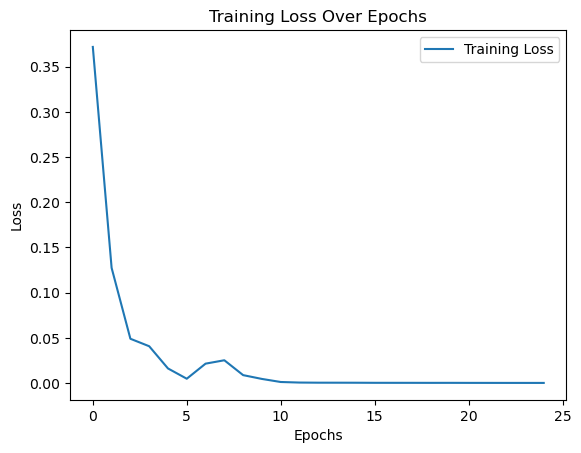

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 8
    Epochs: 30
    Learning rate:1e-05



Epoch 30: 100%|██████████| 143/143 [00:36<00:00,  3.90it/s, loss=3.03e-5]


Loss on training: [0.3904003064844992, 0.18365405161272397, 0.06921578033898886, 0.027396978305691815, 0.027302698045399143, 0.019034763209121237, 0.004909429539416728, 0.008756036864482909, 0.028448599951493982, 0.0058378839002998706, 0.002129754528217669, 0.0005893640527892467, 0.0002536722139876264, 0.00018672251696755354, 0.0001745361333995426, 0.00014062511972379643, 0.00015174155815511004, 0.0001005324440128235, 7.950291717327297e-05, 7.248241535263377e-05, 7.00487759207714e-05, 6.210519063165997e-05, 5.4500454753251437e-05, 5.135568355106736e-05, 5.3308894427312486e-05, 4.568818770745896e-05, 3.7622912726861626e-05, 3.662106343011789e-05, 3.2500887004812445e-05, 3.0255398685169582e-05]


Evaluating: 100%|██████████| 62/62 [00:05<00:00, 11.92it/s]


Accuracy on test set: 0.9366053169734151


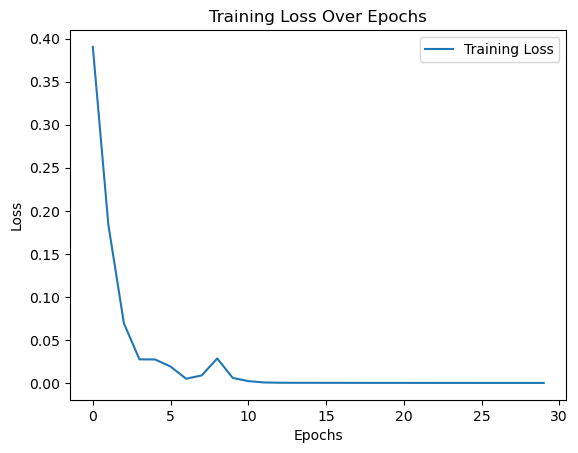

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 8
    Epochs: 30
    Learning rate:0.0001



Epoch 30: 100%|██████████| 143/143 [00:34<00:00,  4.15it/s, loss=4.07e-5]


Loss on training: [0.4017190036813279, 0.18092734443505745, 0.08273584879055568, 0.05234834711861933, 0.01734882214601588, 0.03676833902808049, 0.014269355966195047, 0.007714981415107117, 0.000812459602126513, 0.0012799818059584204, 0.0069029644203707705, 0.00041208399656730203, 0.00030127265250434043, 0.0002541157708648214, 0.00020963339320460492, 0.00018280641488418296, 0.00016832554332710074, 0.00013499941661183795, 0.00011643072390982595, 0.0001081050483211126, 0.00010095191055052374, 8.33166490261723e-05, 7.691617994149984e-05, 7.041069708778392e-05, 6.13399147718715e-05, 5.694443179445888e-05, 5.401432500147567e-05, 4.9446489318181155e-05, 4.3349363836028343e-05, 4.066928584990336e-05]


Evaluating: 100%|██████████| 62/62 [00:04<00:00, 13.42it/s]


Accuracy on test set: 0.9304703476482618


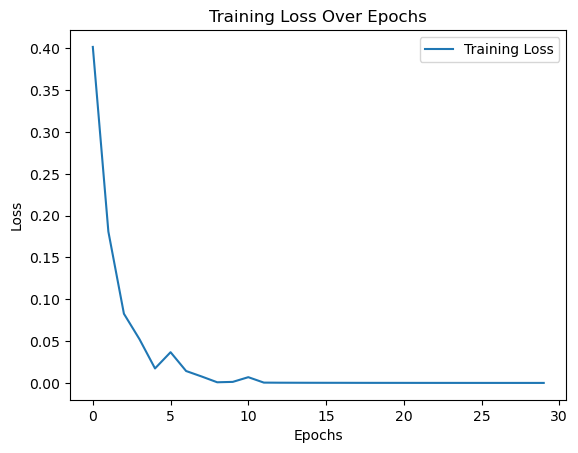

In [9]:
# Parameters
batch_size_list = [4, 8]
epochs_list = [25, 30]
learning_rate_list = [1e-5, 1e-4]

for batch_size in batch_size_list:
    for epochs in epochs_list:
        for learning_rate in learning_rate_list:
            model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to(device)
            
            print(f'Parameters: \n    Batch size: {batch_size}\n    Epochs: {epochs}\n    Learning rate:{learning_rate}\n')
            # Prepare for epoch_losses
            epoch_losses = []
            
            # Create dataloader
            train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
            test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)
            
            # Optimizer
            optimizer = AdamW(model.parameters(), lr=2e-5)
            
            model.train()
            
            # Training loop
            for epoch in range(epochs):
                total_loss = 0
                progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")
            
                for batch in progress_bar:
                    # b_input_ids, b_input_mask, b_labels = batch
                    b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
                    model.zero_grad()
            
                    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
                    loss = outputs.loss
                    total_loss += loss.item()
                    loss.backward()
                    optimizer.step()
            
                    # Update the progress bar
                    progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
                    
                # Calculate and store the average loss for this epoch
                avg_loss = total_loss / len(train_dataloader)
                epoch_losses.append(avg_loss)
                
                # Save the model after each epoch
                # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
                # torch.save(model.state_dict(), model_save_file)
            
                # Closing the progress bar and printing the epoch loss
                progress_bar.close()
                # print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")
            print(f'Loss on training: {epoch_losses}')

            # Switch to evaluation mode
            model.eval()
            predictions, true_labels = [], []
            # Add tqdm progress bar
            for batch in tqdm(test_dataloader, desc="Evaluating"):
                batch = tuple(t.to(device) for t in batch)
                b_input_ids, b_input_mask, b_labels = batch
            
                with torch.no_grad():
                    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
                
                logits = outputs.logits
                logits = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()
            
                batch_preds = np.argmax(logits, axis=1)
                predictions.extend(batch_preds)
                true_labels.extend(label_ids)
            
            # Calculate the accuracy
            accuracy = accuracy_score(true_labels, predictions)
            print(f"Accuracy on test set: {accuracy}")

            # Plotting the training loss
            plt.plot(epoch_losses, label='Training Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Loss Over Epochs')
            plt.legend()
            plt.show()

## Config 9

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 570/570 [00:51<00:00, 11.04it/s, loss=0.605]


Epoch 1 finished. Loss: 0.604719248100331


Epoch 2: 100%|██████████| 570/570 [00:52<00:00, 10.96it/s, loss=0.409] 


Epoch 2 finished. Loss: 0.4085413656998099


Epoch 3: 100%|██████████| 570/570 [00:52<00:00, 10.95it/s, loss=0.303] 


Epoch 3 finished. Loss: 0.3029960371815322


Epoch 4: 100%|██████████| 570/570 [00:52<00:00, 10.93it/s, loss=0.218] 


Epoch 4 finished. Loss: 0.21800761774443744


Epoch 5: 100%|██████████| 570/570 [00:51<00:00, 11.05it/s, loss=0.176] 


Epoch 5 finished. Loss: 0.1761193873981635


Epoch 6: 100%|██████████| 570/570 [00:51<00:00, 11.06it/s, loss=0.143] 


Epoch 6 finished. Loss: 0.143142576022237


Epoch 7: 100%|██████████| 570/570 [00:52<00:00, 10.88it/s, loss=0.104]  


Epoch 7 finished. Loss: 0.1041122071935158


Epoch 8: 100%|██████████| 570/570 [00:53<00:00, 10.69it/s, loss=0.0758]


Epoch 8 finished. Loss: 0.07579711706688007


Epoch 9: 100%|██████████| 570/570 [00:52<00:00, 10.76it/s, loss=0.0624] 


Epoch 9 finished. Loss: 0.062416773550865945


Epoch 10: 100%|██████████| 570/570 [00:52<00:00, 10.79it/s, loss=0.0505]


Epoch 10 finished. Loss: 0.05047385521282099


Epoch 11: 100%|██████████| 570/570 [00:52<00:00, 10.89it/s, loss=0.0421] 


Epoch 11 finished. Loss: 0.04212044457120723


Epoch 12: 100%|██████████| 570/570 [00:52<00:00, 10.88it/s, loss=0.0345] 


Epoch 12 finished. Loss: 0.03450262523215395


Epoch 13: 100%|██████████| 570/570 [00:51<00:00, 10.98it/s, loss=0.0178] 


Epoch 13 finished. Loss: 0.01784964993906518


Epoch 14: 100%|██████████| 570/570 [00:52<00:00, 10.96it/s, loss=0.0165] 


Epoch 14 finished. Loss: 0.01654869586090443


Epoch 15: 100%|██████████| 570/570 [00:51<00:00, 10.99it/s, loss=0.0152] 


Epoch 15 finished. Loss: 0.015175077006049259


Epoch 16: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0.00968]


Epoch 16 finished. Loss: 0.009684497025680907


Epoch 17: 100%|██████████| 570/570 [00:51<00:00, 10.98it/s, loss=0.015]  


Epoch 17 finished. Loss: 0.015013688844792022


Epoch 18: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0.00429] 


Epoch 18 finished. Loss: 0.004290825295519378


Epoch 19: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0.014]   


Epoch 19 finished. Loss: 0.013970253145395729


Epoch 20: 100%|██████████| 570/570 [00:51<00:00, 10.96it/s, loss=0.0162] 


Epoch 20 finished. Loss: 0.016150779417397357


Epoch 21: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0.0187] 


Epoch 21 finished. Loss: 0.018710570084237446


Epoch 22: 100%|██████████| 570/570 [00:52<00:00, 10.93it/s, loss=0.0078]  


Epoch 22 finished. Loss: 0.007799731129310665


Epoch 23: 100%|██████████| 570/570 [00:52<00:00, 10.89it/s, loss=0.00294] 


Epoch 23 finished. Loss: 0.0029353153321017888


Epoch 24: 100%|██████████| 570/570 [00:53<00:00, 10.64it/s, loss=0.00389] 


Epoch 24 finished. Loss: 0.00388891459371192


Epoch 25: 100%|██████████| 570/570 [00:53<00:00, 10.57it/s, loss=0.0111]  


Epoch 25 finished. Loss: 0.011072590641816262


Evaluating: 100%|██████████| 245/245 [00:05<00:00, 42.48it/s]


Accuracy on test set: 0.9079754601226994


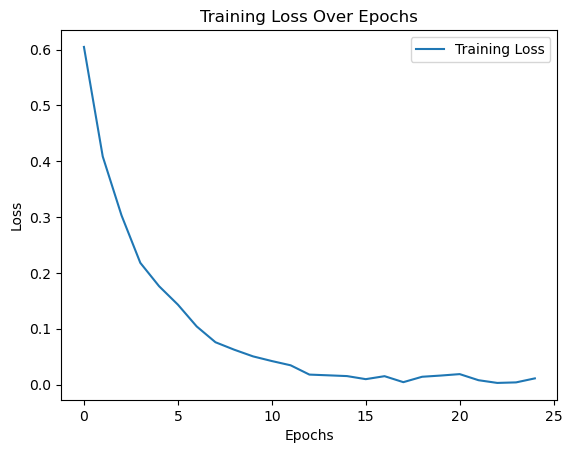

In [10]:
epochs = 25
batch_size = 2
# Prepare for epoch_losses
epoch_losses = []

# Create dataloader
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to(device)
# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-6)

model.train()
# Training loop
for epoch in range(epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")

    for batch in progress_bar:
        # b_input_ids, b_input_mask, b_labels = batch
        b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
        
    # Calculate and store the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    epoch_losses.append(avg_loss)
    
    # Save the model after each epoch
    # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
    # torch.save(model.state_dict(), model_save_file)

    # Closing the progress bar and printing the epoch loss
    progress_bar.close()
    print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")

# Switch to evaluation mode
model.eval()
predictions, true_labels = [], []
# Add tqdm progress bar
for batch in tqdm(test_dataloader, desc="Evaluating"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    batch_preds = np.argmax(logits, axis=1)
    predictions.extend(batch_preds)
    true_labels.extend(label_ids)

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {accuracy}")

# Plotting the training loss
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

## Config 10

In [11]:
epochs = 25
batch_size = 8
# Prepare for epoch_losses
epoch_losses = []

# Create dataloader
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to(device)
# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
# Training loop
for epoch in range(epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")

    for batch in progress_bar:
        # b_input_ids, b_input_mask, b_labels = batch
        b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
        
    # Calculate and store the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    epoch_losses.append(avg_loss)
    
    # Save the model after each epoch
    # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
    # torch.save(model.state_dict(), model_save_file)

    # Closing the progress bar and printing the epoch loss
    progress_bar.close()
    print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 143/143 [00:37<00:00,  3.85it/s, loss=0.419]


Epoch 1 finished. Loss: 0.4189913151199584


Epoch 2: 100%|██████████| 143/143 [00:34<00:00,  4.11it/s, loss=0.217]


Epoch 2 finished. Loss: 0.21695001398610486


Epoch 3: 100%|██████████| 143/143 [00:35<00:00,  4.08it/s, loss=0.104] 


Epoch 3 finished. Loss: 0.10395444329775921


Epoch 4: 100%|██████████| 143/143 [00:34<00:00,  4.12it/s, loss=0.0799]


Epoch 4 finished. Loss: 0.07987006853979367


Epoch 5: 100%|██████████| 143/143 [00:34<00:00,  4.11it/s, loss=0.029] 


Epoch 5 finished. Loss: 0.029038808004070934


Epoch 6: 100%|██████████| 143/143 [00:35<00:00,  4.05it/s, loss=0.0313] 


Epoch 6 finished. Loss: 0.03131093059656686


Epoch 7: 100%|██████████| 143/143 [00:34<00:00,  4.12it/s, loss=0.0492]


Epoch 7 finished. Loss: 0.0492200924000553


Epoch 8: 100%|██████████| 143/143 [00:35<00:00,  4.03it/s, loss=0.00214]


Epoch 8 finished. Loss: 0.0021441811768963307


Epoch 9: 100%|██████████| 143/143 [00:35<00:00,  4.07it/s, loss=0.00145]


Epoch 9 finished. Loss: 0.0014514960336394712


Epoch 10: 100%|██████████| 143/143 [00:35<00:00,  4.06it/s, loss=0.000926]


Epoch 10 finished. Loss: 0.0009260845333549448


Epoch 11: 100%|██████████| 143/143 [00:35<00:00,  4.07it/s, loss=0.000731]


Epoch 11 finished. Loss: 0.0007314611567425301


Epoch 12: 100%|██████████| 143/143 [00:35<00:00,  4.07it/s, loss=0.000707]


Epoch 12 finished. Loss: 0.0007073426624463701


Epoch 13: 100%|██████████| 143/143 [00:34<00:00,  4.14it/s, loss=0.0005]  


Epoch 13 finished. Loss: 0.0004997134293751934


Epoch 14: 100%|██████████| 143/143 [00:35<00:00,  4.05it/s, loss=0.000405]


Epoch 14 finished. Loss: 0.00040457841420832736


Epoch 15: 100%|██████████| 143/143 [00:34<00:00,  4.09it/s, loss=0.000349]


Epoch 15 finished. Loss: 0.00034865639168423944


Epoch 16: 100%|██████████| 143/143 [00:35<00:00,  4.08it/s, loss=0.000303]


Epoch 16 finished. Loss: 0.00030294174181502573


Epoch 17: 100%|██████████| 143/143 [00:35<00:00,  4.09it/s, loss=0.00026] 


Epoch 17 finished. Loss: 0.0002598815123995089


Epoch 18: 100%|██████████| 143/143 [00:35<00:00,  4.08it/s, loss=0.000231]


Epoch 18 finished. Loss: 0.00023061735240068496


Epoch 19: 100%|██████████| 143/143 [00:35<00:00,  4.07it/s, loss=0.000207]


Epoch 19 finished. Loss: 0.0002069762387716739


Epoch 20: 100%|██████████| 143/143 [00:35<00:00,  4.05it/s, loss=0.000178]


Epoch 20 finished. Loss: 0.00017818043933867092


Epoch 21: 100%|██████████| 143/143 [00:35<00:00,  4.07it/s, loss=0.000156]


Epoch 21 finished. Loss: 0.00015567666025697157


Epoch 22: 100%|██████████| 143/143 [00:34<00:00,  4.09it/s, loss=0.000142]


Epoch 22 finished. Loss: 0.0001417941845696211


Epoch 23: 100%|██████████| 143/143 [00:35<00:00,  4.06it/s, loss=0.000128]


Epoch 23 finished. Loss: 0.00012827830897339692


Epoch 24: 100%|██████████| 143/143 [00:35<00:00,  4.08it/s, loss=0.000115]


Epoch 24 finished. Loss: 0.0001151122382176076


Epoch 25: 100%|██████████| 143/143 [00:34<00:00,  4.14it/s, loss=0.000103]

Epoch 25 finished. Loss: 0.00010258485557502494


In [12]:
model_save_path = 'models'  
os.makedirs(model_save_path, exist_ok=True)
final_model_save_file = os.path.join(model_save_path, 'bert_final_model_1.pt')
torch.save(model.state_dict(), final_model_save_file)

# print paramter
print("Training Parameters:")
print(f"Batch Size: {batch_size}")
print(f"Epochs: {epochs}")
print(f"Learning Rate: {optimizer.defaults['lr']}")
print(f"Beta1: {optimizer.defaults['betas'][0]}")
print(f"Beta2: {optimizer.defaults['betas'][1]}")

print(f"Training completed. Final model saved to {final_model_save_file}")

Training Parameters:
Batch Size: 8
Epochs: 25
Learning Rate: 2e-05
Beta1: 0.9
Beta2: 0.999
Training completed. Final model saved to models\bert_final_model_1.pt


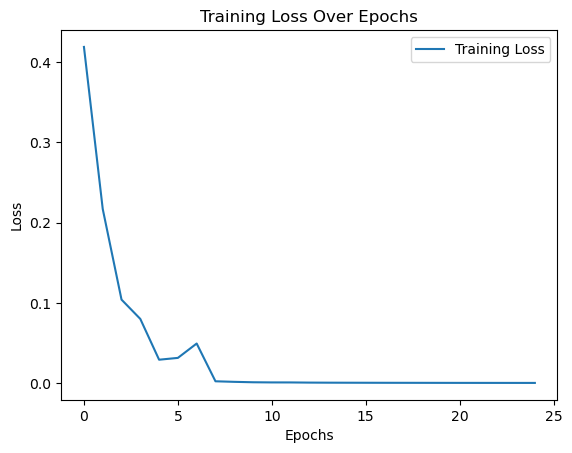

In [13]:
# Plotting the training loss
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Evulation 

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Switch to evaluation mode
model.eval()

predictions, true_labels = [], []

# Add tqdm progress bar
for batch in tqdm(test_dataloader, desc="Evaluating"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    batch_preds = np.argmax(logits, axis=1)
    predictions.extend(batch_preds)
    true_labels.extend(label_ids)

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {accuracy}")

Evaluating: 100%|██████████| 62/62 [00:04<00:00, 13.04it/s]

Accuracy on test set: 0.9263803680981595


### K-Fold

In [15]:
import numpy as np
# Define the KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize performance metric list
fold_performance = []

# Parameters
batch_size = 8
epochs = 25
learning_rate = 2e-5

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start the KFold cross-validation
for fold, (train_ids, test_ids) in enumerate(kf.split(dataset)):
    print(f"FOLD {fold}")
    print("-------------------------------")

    # Split the data into training and validation sets for the current fold
    train_subset = Subset(dataset, train_ids)
    test_subset = Subset(dataset, test_ids)
    
    train_dataloader = DataLoader(train_subset, sampler=RandomSampler(train_subset), batch_size=batch_size)
    test_dataloader = DataLoader(test_subset, sampler=SequentialSampler(test_subset), batch_size=batch_size)
    
    # Initialize the BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
    model.to(device)
    
    # Define the optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    model.train()
    
    # Training loop for the current fold
    for epoch in range(epochs):
        total_loss = 0
        
        train_progress_bar = tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}/{epochs}, Fold {fold+1}/10")
        
        for step, batch in enumerate(train_progress_bar):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch
            
            model.zero_grad()
            
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            
            loss.backward()
            optimizer.step()
            
            train_progress_bar.set_postfix(loss=total_loss/(step+1))
        
        train_progress_bar.close()
        
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
        
    # Validation step
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    eval_progress_bar = tqdm(test_dataloader, desc=f"Validation, Fold {fold+1}/10")

    for batch in eval_progress_bar:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
    
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
    
        loss = outputs.loss
        total_eval_loss += loss.item()
    
        # Move logits and labels to CPU
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences
        preds = np.argmax(logits, axis=1)
        batch_accuracy = np.mean(preds == label_ids)
        total_eval_accuracy += batch_accuracy
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    print(f"Validation accuracy: {avg_val_accuracy}")


    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(test_dataloader)
    
    # Record all statistics from this epoch.
    fold_performance.append({
        'fold': fold,
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss,
        'val_accuracy': avg_val_accuracy
    })

    eval_progress_bar.close()

# Calculate and print the average performance across all folds
average_performance = {
    'avg_train_loss': np.mean([x['train_loss'] for x in fold_performance]),
    'avg_val_loss': np.mean([x['val_loss'] for x in fold_performance]),
    'avg_val_accuracy': np.mean([x['val_accuracy'] for x in fold_performance])
}
print(f"Average performance across all folds: {average_performance}")

FOLD 0
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Validation, Fold 1/10: 100%|██████████| 21/21 [00:01<00:00, 12.44it/s]


Validation accuracy: 0.9464285714285714
FOLD 1
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 2/10: 100%|██████████| 21/21 [00:01<00:00, 13.34it/s]


Validation accuracy: 0.9246031746031746
FOLD 2
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 3/10: 100%|██████████| 21/21 [00:01<00:00, 13.27it/s]


Validation accuracy: 0.9642857142857143
FOLD 3
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 4/10: 100%|██████████| 21/21 [00:01<00:00, 13.27it/s]


Validation accuracy: 0.8769841269841271
FOLD 4
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 5/10: 100%|██████████| 21/21 [00:01<00:00, 13.40it/s]


Validation accuracy: 0.9107142857142857
FOLD 5
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 6/10: 100%|██████████| 21/21 [00:01<00:00, 13.72it/s]


Validation accuracy: 0.9166666666666666
FOLD 6
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 7/10: 100%|██████████| 21/21 [00:01<00:00, 14.68it/s]


Validation accuracy: 0.9404761904761905
FOLD 7
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 8/10: 100%|██████████| 21/21 [00:01<00:00, 14.67it/s]


Validation accuracy: 0.9285714285714286
FOLD 8
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 9/10: 100%|██████████| 21/21 [00:01<00:00, 12.68it/s]


Validation accuracy: 0.9404761904761905
FOLD 9
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 10/10: 100%|██████████| 21/21 [00:01<00:00, 13.68it/s]

Validation accuracy: 0.9107142857142857
Average performance across all folds: {'avg_train_loss': 0.001972767296634313, 'avg_val_loss': 0.445684893727481, 'avg_val_accuracy': 0.9259920634920634}
